<a href="https://colab.research.google.com/github/devLarissaRodrigues/WoMakersCode-DataAnalytics-DesafiosEmSquad/blob/main/Desafio6_completo_em_squad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Desafio 6: Desafio de Classificação - Diagnóstico de Alzheimer com Dados Cognitivos

### Bootcamp Data Analytics – WoMakersCode  
👩🏽‍💻 Squad: Mae C. Jemison
### 👥 Integrantes:

- Amparo Silvia Pastor Castillo Runschka  
- Cristiana Alves Moura  
- Fernanda Monello Correa Manoel  
- Larissa Monique de Sousa Rodrigues  
- Raquel Nunes Matos Rios  
- Vanessa Lima Paraizo  
- Verônica Lima Costa  

## 📝 Descrição do Desafio

Contexto
Este desafio utiliza o conjunto de dados OASIS (Open Access Series of
Imaging Studies), que contém informações clínicas e demográficas de
pacientes com potencial risco de Alzheimer. O objetivo é prever se o
paciente apresenta sinais de demência.
A variável alvo é binária:
* 0: Sem demência
* 1: Com demência

📁 *Este notebook contém todas as etapas da análise de dados desenvolvida para o desafio.*

## 📚 Importação de Bibliotecas

Antes de começar, vamos importar as bibliotecas necessárias para manipulação, análise e visualização dos dados.

In [1]:
# Manipulação e análise de dados
import pandas as pd
import numpy as np

# Visualização
import seaborn as sns
import matplotlib.pyplot as plt

# Configurações estéticas para os gráficos
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Estatística
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Avisos
import warnings
warnings.simplefilter(action='ignore')

### 📁 Visualização Inicial

Nesta etapa, vamos observar as primeiras linhas do dataset para entender sua estrutura, as colunas disponíveis e o formato dos dados.

Nosso objetivo aqui é ter uma visão geral antes de qualquer limpeza ou tratamento.

In [2]:
# Configurando URL a partir do id do arquivo compartilhado

id_do_arquivo = "1FmLKaVzvG7YD8dwMFlw-W5ZuGCbuRcPb"
url = f'https://drive.google.com/uc?id={id_do_arquivo}&export=download'
df = pd.read_csv(url)
df.head()

,Age,Sex,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,Group
0,66,M,19,5,21,1.0,1474,0.768,1.11,0
1,79,M,14,5,22,2.0,1630,0.722,0.82,0
2,88,M,8,5,22,0.0,1432,0.668,1.24,1
3,74,M,14,3,24,1.0,1276,0.833,1.29,0
4,70,M,18,4,25,0.0,1605,0.677,1.28,0


### 📉 Verificação de Valores Ausentes e Duplicatas

Nesta etapa, vamos verificar se existem valores ausentes ou registros duplicados no dataset.

Esses problemas podem impactar os resultados das análises estatísticas e visualizações, e devem ser tratados ainda na fase de pré-processamento.

In [3]:
# Verificar tipos de dados e valores nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     200 non-null    int64  
 1   Sex     200 non-null    object 
 2   EDUC    200 non-null    int64  
 3   SES     200 non-null    int64  
 4   MMSE    200 non-null    int64  
 5   CDR     200 non-null    float64
 6   eTIV    200 non-null    int64  
 7   nWBV    200 non-null    float64
 8   ASF     200 non-null    float64
 9   Group   200 non-null    int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 15.8+ KB


In [4]:
# Verificar valores ausentes
print("🔍 Valores ausentes por coluna:")
print(df.isnull().sum())

# Verificar registros duplicados
duplicatas = df.duplicated().sum()
print(f"\n📦 Registros duplicados encontrados: {duplicatas}")

🔍 Valores ausentes por coluna:
Age      0
Sex      0
EDUC     0
SES      0
MMSE     0
CDR      0
eTIV     0
nWBV     0
ASF      0
Group    0
dtype: int64

📦 Registros duplicados encontrados: 0


In [5]:
# Obtenção de dados estatísticos
df.describe()

,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF,Group
count,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,74.820000,12.335000,3.110000,19.57500,0.830000,1494.100000,0.757850,1.048050,0.270000
std,9.094015,4.214449,1.469249,5.93807,0.730595,104.309358,0.060322,0.148604,0.445074
min,60.000000,6.000000,1.000000,10.00000,0.000000,1234.000000,0.651000,0.800000,0.000000
25%,67.000000,8.750000,2.000000,14.00000,0.000000,1420.000000,0.702000,0.910000,0.000000
50%,74.000000,12.000000,3.000000,20.00000,0.500000,1497.500000,0.767000,1.040000,0.000000
75%,83.000000,16.000000,4.000000,25.00000,1.000000,1559.250000,0.813250,1.170000,1.000000
max,89.000000,19.000000,5.000000,29.00000,2.000000,1764.000000,0.850000,1.300000,1.000000


In [6]:
# Selecionando variáveis numéricas de acordo com os tipos:

# Seleciona apenas colunas numéricas
numerico_df = df.select_dtypes(include=['float64', 'int64'])

# Exibe os nomes das colunas numéricas
numerico_df.columns

Index(['Age', 'EDUC', 'SES', 'MMSE', 'CDR', 'eTIV', 'nWBV', 'ASF', 'Group'], dtype='object')

In [7]:
# Calculando a correlação de Pearson

# Selecionando variáveis numéricas de acordo com os tipos:
numerico_df = df.select_dtypes(include=['float64', 'int64'])

# Calcula a correlação de todas as variáveis numéricas
correlations = numerico_df.corr()
# Exibe as correlações
print(correlations)

            Age      EDUC       SES      MMSE       CDR      eTIV      nWBV  \
Age    1.000000  0.022560  0.023303 -0.095969  0.016927 -0.037005 -0.066078   
EDUC   0.022560  1.000000  0.025669  0.045074  0.085502  0.000758 -0.005909   
SES    0.023303  0.025669  1.000000  0.084870  0.090070  0.052259  0.110977   
MMSE  -0.095969  0.045074  0.084870  1.000000 -0.134885 -0.040504 -0.020970   
CDR    0.016927  0.085502  0.090070 -0.134885  1.000000 -0.049527  0.064811   
eTIV  -0.037005  0.000758  0.052259 -0.040504 -0.049527  1.000000  0.027471   
nWBV  -0.066078 -0.005909  0.110977 -0.020970  0.064811  0.027471  1.000000   
ASF    0.031457  0.089791  0.081542  0.177585 -0.034311 -0.104985  0.002546   
Group -0.108361  0.050660  0.154153  0.036031 -0.020399  0.063927 -0.073165   

            ASF     Group  
Age    0.031457 -0.108361  
EDUC   0.089791  0.050660  
SES    0.081542  0.154153  
MMSE   0.177585  0.036031  
CDR   -0.034311 -0.020399  
eTIV  -0.104985  0.063927  
nWBV   0.0025

In [11]:
# Calcular correlação com a variável alvo
correlation = numerico_df.corr()['Group'].sort_values(ascending=False)
correlation

,Group
Group,1.000000
SES,0.154153
eTIV,0.063927
EDUC,0.050660
MMSE,0.036031
ASF,0.019397
CDR,-0.020399
nWBV,-0.073165
Age,-0.108361


🔝 **Top 3 correlações positivas:**

SES (Status Socioeconômico): 0.15

eTIV (Volume intracraniano): 0.06

EDUC (Escolaridade): 0.05

🔻 **Top 3 correlações negativas:**

Age (Idade): -0.11

nWBV (Volume cerebral normalizado): -0.07

CDR (Clinical Dementia Rating): -0.02 ← surpreendente, mas pode ser explicável por como os dados foram rotulados.

#👀 Nenhuma variável tem correlação forte (> 0.3), mas SES, eTIV, e Age parecem ser os preditores mais relevantes inicialmente.

In [ ]:
# 1. Importar bibliotecas
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
# Transformar variável categórica 'Sex' em valores numéricos
df = pd.get_dummies(df, columns=['Sex'], drop_first=True)
# Isso cria uma coluna 'Sex_M' com 0 para F e 1 para M (evita multicolinearidade)

In [12]:
# Separar features (X) e alvo (y)
X = df.drop('Group', axis=1)
y = df['Group']

# Dividir treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)  #NO CODIGO ORIGINAL É ASSIM QUE ESTAVA, EU MUDEI PARA FICAR  .fit_transform, ACHEI QUE É O CORRETO POREM NÃO SEI
X_test = scaler.fit_transform(X_test)

In [ ]:
# Treinar e avaliar modelos

# Regressão Logística
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Regressão Logística:")
print(classification_report(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))

# Árvore de Decisão
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
print("Árvore de Decisão:")
print(classification_report(y_test, y_pred_tree))
print(confusion_matrix(y_test, y_pred_tree))

# Random Forest
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest:")
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))

In [ ]:
from sklearn.metrics import classification_report

# Armazenar os relatórios como dicionários
report_lr = classification_report(y_test, y_pred_lr, output_dict=True)
report_tree = classification_report(y_test, y_pred_tree, output_dict=True)
report_rf = classification_report(y_test, y_pred_rf, output_dict=True)

# Criar um DataFrame comparativo
results = pd.DataFrame({
    'Logistic Regression': pd.Series(report_lr['weighted avg']),
    'Decision Tree': pd.Series(report_tree['weighted avg']),
    'Random Forest': pd.Series(report_rf['weighted avg'])
})

# Exibir apenas precision, recall e f1-score
display(results.loc[['precision', 'recall', 'f1-score']].round(2))


,Logistic Regression,Decision Tree,Random Forest
precision,0.56,0.62,0.56
recall,0.75,0.65,0.72
f1-score,0.64,0.64,0.63


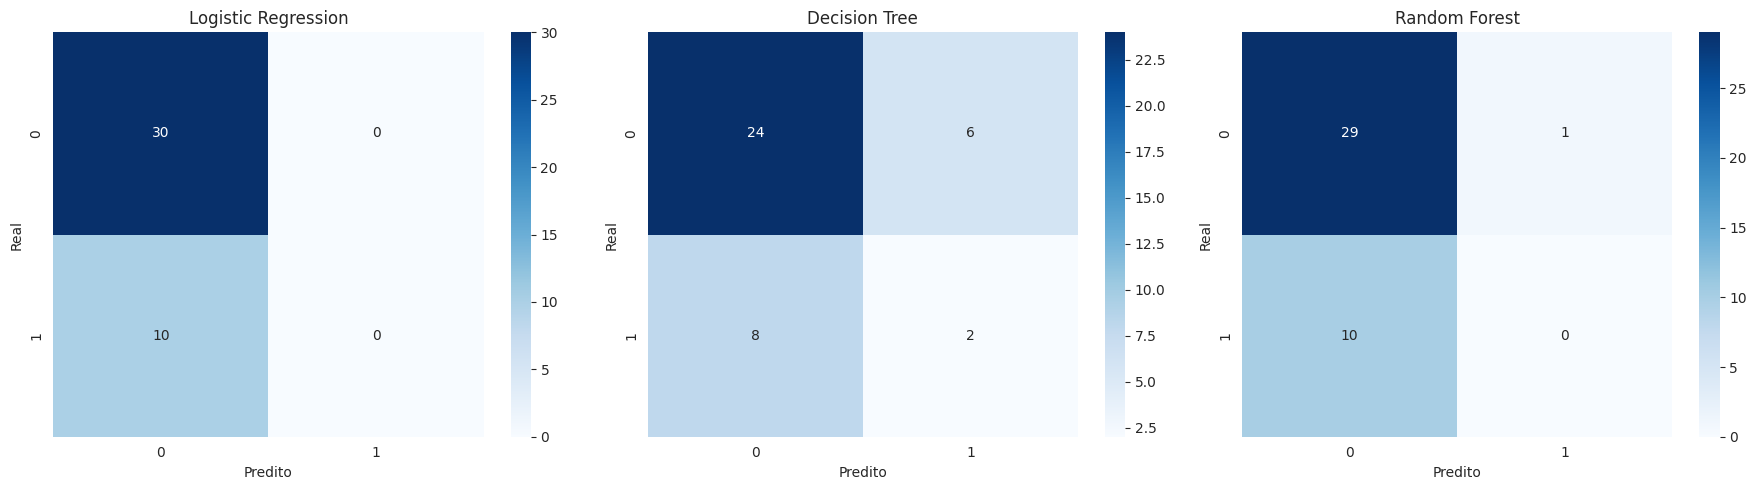

In [ ]:
from sklearn.metrics import confusion_matrix

models = {
    'Logistic Regression': y_pred_lr,
    'Decision Tree': y_pred_tree,
    'Random Forest': y_pred_rf
}

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for ax, (name, y_pred) in zip(axes, models.items()):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(name)
    ax.set_xlabel('Predito')
    ax.set_ylabel('Real')
plt.tight_layout()
plt.show()


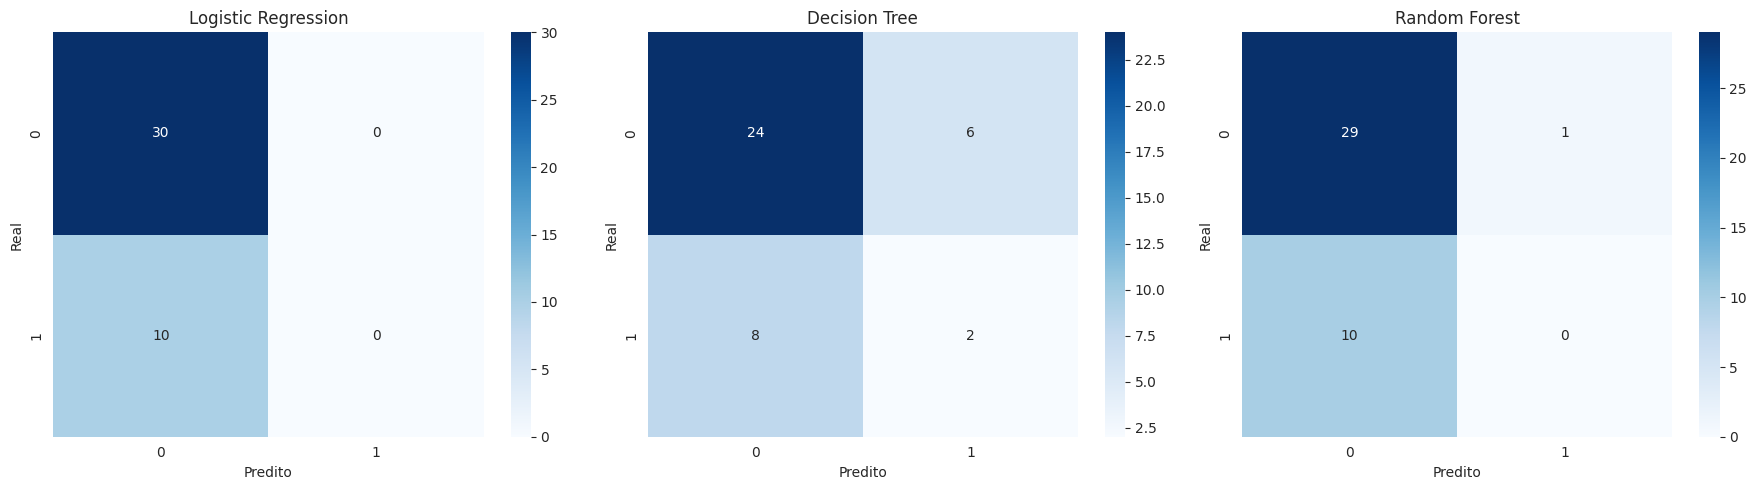

In [ ]:
from sklearn.metrics import confusion_matrix

models = {
    'Logistic Regression': y_pred_lr,
    'Decision Tree': y_pred_tree,
    'Random Forest': y_pred_rf
}

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for ax, (name, y_pred) in zip(axes, models.items()):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(name)
    ax.set_xlabel('Predito')
    ax.set_ylabel('Real')
plt.tight_layout()
plt.show()


### Balanceando os dados

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separar features e alvo
X = df.drop('Group', axis=1)
y = df['Group']

# Codificar variáveis categóricas (ex: Sex)
X = pd.get_dummies(X, drop_first=True)  # Transforma 'Sex' em coluna binária

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=42)

# Aplicar SMOTE **apenas no conjunto de treino**
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Normalizar
scaler = StandardScaler()
X_train_res = scaler.fit_transform(X_train_res)
X_test = scaler.transform(X_test)


### Treinamento do modelo com os dados balanceados

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Exemplo: Regressão Logística com dados balanceados
model = LogisticRegression()
model.fit(X_train_res, y_train_res)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.76      0.59      0.67        44
           1       0.31      0.50      0.38        16

    accuracy                           0.57        60
   macro avg       0.54      0.55      0.52        60
weighted avg       0.64      0.57      0.59        60

[[26 18]
 [ 8  8]]


### Treinamento do modelo com os dados balanceados

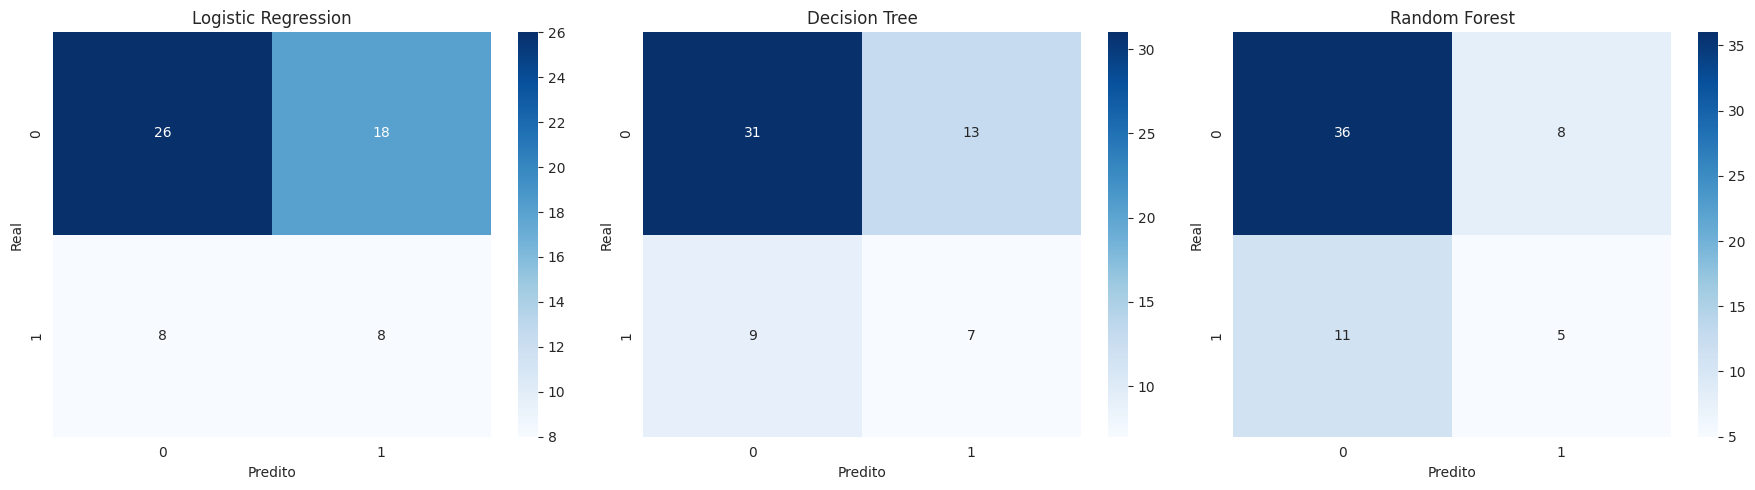

In [ ]:
models = {}

# Treinamento com dados balanceados (após SMOTE)
logreg = LogisticRegression()
logreg.fit(X_train_res, y_train_res)
models['Logistic Regression'] = logreg.predict(X_test)

tree = DecisionTreeClassifier()
tree.fit(X_train_res, y_train_res)
models['Decision Tree'] = tree.predict(X_test)

rf = RandomForestClassifier()
rf.fit(X_train_res, y_train_res)
models['Random Forest'] = rf.predict(X_test)

# Gráfico de matrizes de confusão
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for ax, (name, y_pred) in zip(axes, models.items()):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(name)
    ax.set_xlabel('Predito')
    ax.set_ylabel('Real')

plt.tight_layout()
plt.show()
